####This is the second part of the project.Here, we will try to evaluate if we can build a predictve model for stock price using Machine Learning algorithms.

####The dataset used for this project were imported from yfinance using it's API.

Company Labels:
XOM = ExxonMobil
COP = ConocoPhillips
CVX = Chevron Corporation

In [0]:
pip install keras 

Python interpreter will be restarted.
Python interpreter will be restarted.


In [0]:
pip install tensorflow

Python interpreter will be restarted.
Python interpreter will be restarted.


In [0]:
!pip install yfinance

You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-bd4bb636-9d50-4cc0-ac9d-806920c62369/bin/python -m pip install --upgrade pip' command.


In [0]:
## Importing libraries
import yfinance as yf
import matplotlib.pyplot as plt
import datetime
import pyspark.sql.functions as f
import numpy as np
import pandas as pd
from pyspark.sql.types import StringType, DateType, FloatType,IntegerType
from pyspark import SparkConf, SparkContext
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator
from  pyspark.sql.functions import abs
import sys
%matplotlib inline

In [0]:
stock1="XOM" 
stock2="CVX"
stock3="COP"
start = datetime.datetime(2000,1,1)
end = datetime.datetime(2022,4,30)
stock_price_XOM = yf.download(stock1,start=start,end = end, interval='1d')
stock_price_CVX = yf.download(stock2,start=start,end = end, interval='1d')
stock_price_COP = yf.download(stock3,start=start,end = end, interval='1d')

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [0]:
stock_price_XOM.reset_index(inplace = True)
stock_price_CVX.reset_index(inplace = True)
stock_price_COP.reset_index(inplace = True)

In [0]:
stock_price_XOM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5618 entries, 0 to 5617
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5618 non-null   datetime64[ns]
 1   Open       5618 non-null   float64       
 2   High       5618 non-null   float64       
 3   Low        5618 non-null   float64       
 4   Close      5618 non-null   float64       
 5   Adj Close  5618 non-null   float64       
 6   Volume     5618 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 307.4 KB


In [0]:
stock_price_COP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5618 entries, 0 to 5617
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5618 non-null   datetime64[ns]
 1   Open       5618 non-null   float64       
 2   High       5618 non-null   float64       
 3   Low        5618 non-null   float64       
 4   Close      5618 non-null   float64       
 5   Adj Close  5618 non-null   float64       
 6   Volume     5618 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 307.4 KB


In [0]:
stock_price_CVX.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5618 entries, 0 to 5617
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       5618 non-null   datetime64[ns]
 1   Open       5618 non-null   float64       
 2   High       5618 non-null   float64       
 3   Low        5618 non-null   float64       
 4   Close      5618 non-null   float64       
 5   Adj Close  5618 non-null   float64       
 6   Volume     5618 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 307.4 KB


In [0]:
stock_column= ["Date","Open","High","Low","Close","Adj Close","Volume" ]
stock_price_XOM = spark.createDataFrame(stock_price_XOM,stock_column)
stock_price_COP = spark.createDataFrame(stock_price_COP,stock_column)
stock_price_CVX = spark.createDataFrame(stock_price_CVX,stock_column)

In [0]:
stock_price_XOM= stock_price_XOM.withColumn("Date" ,
              stock_price_XOM["Date"]
              .cast(DateType())).withColumn("Open",
              stock_price_XOM["Open"]
              .cast(FloatType())).withColumn("High",
              stock_price_XOM["High"]
              .cast(FloatType())).withColumn("Low",
              stock_price_XOM["Low"]
              .cast(FloatType())).withColumn("Close",
              stock_price_XOM["Close"]
              .cast(FloatType())).withColumn("Adj Close",
              stock_price_XOM["Adj Close"]
              .cast(FloatType())).withColumn("Volume",
              stock_price_XOM["Volume"]
              .cast(IntegerType()))

stock_price_XOM.printSchema()

root
 |-- Date: date (nullable = true)
 |-- Open: float (nullable = true)
 |-- High: float (nullable = true)
 |-- Low: float (nullable = true)
 |-- Close: float (nullable = true)
 |-- Adj Close: float (nullable = true)
 |-- Volume: integer (nullable = true)



In [0]:
stock_price_COP= stock_price_COP.withColumn("Date" ,
              stock_price_COP["Date"]
              .cast(DateType())).withColumn("Open",
              stock_price_COP["Open"]
              .cast(FloatType())).withColumn("High",
              stock_price_COP["High"]
              .cast(FloatType())).withColumn("Low",
              stock_price_COP["Low"]
              .cast(FloatType())).withColumn("Close",
              stock_price_COP["Close"]
              .cast(FloatType())).withColumn("Adj Close",
              stock_price_COP["Adj Close"]
              .cast(FloatType())).withColumn("Volume",
              stock_price_COP["Volume"]
              .cast(IntegerType()))

stock_price_COP.printSchema()

root
 |-- Date: date (nullable = true)
 |-- Open: float (nullable = true)
 |-- High: float (nullable = true)
 |-- Low: float (nullable = true)
 |-- Close: float (nullable = true)
 |-- Adj Close: float (nullable = true)
 |-- Volume: integer (nullable = true)



In [0]:
stock_price_CVX= stock_price_CVX.withColumn("Date" ,
              stock_price_CVX["Date"]
              .cast(DateType())).withColumn("Open",
              stock_price_CVX["Open"]
              .cast(FloatType())).withColumn("High",
              stock_price_CVX["High"]
              .cast(FloatType())).withColumn("Low",
              stock_price_CVX["Low"]
              .cast(FloatType())).withColumn("Close",
              stock_price_CVX["Close"]
              .cast(FloatType())).withColumn("Adj Close",
              stock_price_CVX["Adj Close"]
              .cast(FloatType())).withColumn("Volume",
              stock_price_CVX["Volume"]
              .cast(IntegerType()))

stock_price_CVX.printSchema()

root
 |-- Date: date (nullable = true)
 |-- Open: float (nullable = true)
 |-- High: float (nullable = true)
 |-- Low: float (nullable = true)
 |-- Close: float (nullable = true)
 |-- Adj Close: float (nullable = true)
 |-- Volume: integer (nullable = true)



In [0]:
split_date=f.split(stock_price_XOM['Date'], '-') 
stock_price_XOM= stock_price_XOM.withColumn('Year', split_date.getItem(0))
stock_price_XOM= stock_price_XOM.withColumn('Month', split_date.getItem(1))
stock_price_XOM= stock_price_XOM.withColumn('Day', split_date.getItem(2))

split_date=f.split(stock_price_COP['Date'], '-') 
stock_price_COP= stock_price_COP.withColumn('Year', split_date.getItem(0))
stock_price_COP= stock_price_COP.withColumn('Month', split_date.getItem(1))
stock_price_COP= stock_price_COP.withColumn('Day', split_date.getItem(2))

split_date=f.split(stock_price_CVX['Date'], '-') 
stock_price_CVX= stock_price_CVX.withColumn('Year', split_date.getItem(0))
stock_price_CVX= stock_price_CVX.withColumn('Month', split_date.getItem(1))
stock_price_CVX= stock_price_CVX.withColumn('Day', split_date.getItem(2))

In [0]:
stock_price_XOM.show(5)

+----------+--------+--------+--------+--------+---------+--------+----+-----+---+
|      Date|    Open|    High|     Low|   Close|Adj Close|  Volume|Year|Month|Day|
+----------+--------+--------+--------+--------+---------+--------+----+-----+---+
|2000-01-03|   39.75|  40.375| 38.9375|39.15625|19.472015|13458200|2000|   01| 03|
|2000-01-04| 38.6875|39.09375|   38.25|38.40625|19.099037|14510800|2000|   01| 04|
|2000-01-05|    39.0|  40.875|38.90625|    40.5| 20.14024|17485000|2000|   01| 05|
|2000-01-06| 40.3125|42.90625|40.09375|42.59375|21.181446|19461600|2000|   01| 06|
|2000-01-07|42.96875|  43.125|    42.0|42.46875| 21.11929|16603800|2000|   01| 07|
+----------+--------+--------+--------+--------+---------+--------+----+-----+---+
only showing top 5 rows



In [0]:
stock_price_CVX.show(5)

+----------+--------+--------+--------+--------+---------+-------+----+-----+---+
|      Date|    Open|    High|     Low|   Close|Adj Close| Volume|Year|Month|Day|
+----------+--------+--------+--------+--------+---------+-------+----+-----+---+
|2000-01-03| 42.9375| 42.9375|41.28125| 41.8125|18.311811|4387600|2000|   01| 03|
|2000-01-04|41.46875| 42.0625|   41.25| 41.8125|18.311811|3702400|2000|   01| 04|
|2000-01-05|41.53125|43.28125|41.53125| 42.5625|18.640263|5567600|2000|   01| 05|
|2000-01-06|42.65625|44.59375|42.65625|  44.375| 19.43406|4353400|2000|   01| 06|
|2000-01-07|    45.0| 45.4375|    44.5|45.15625|19.776203|4487400|2000|   01| 07|
+----------+--------+--------+--------+--------+---------+-------+----+-----+---+
only showing top 5 rows



In [0]:
stock_price_COP.show(5)

+----------+---------+---------+---------+---------+---------+-------+----+-----+---+
|      Date|     Open|     High|      Low|    Close|Adj Close| Volume|Year|Month|Day|
+----------+---------+---------+---------+---------+---------+-------+----+-----+---+
|2000-01-03| 17.72386|17.771505|17.247412|17.271235|8.6520605|1862219|2000|   01| 03|
|2000-01-04|17.104479|17.247412| 16.84243|16.937721| 8.484992|1472879|2000|   01| 04|
|2000-01-05| 17.03301|  17.1283|16.461273| 16.62803|  8.32985|4075997|2000|   01| 05|
|2000-01-06|16.675674|17.390347|16.485096|17.199766|  8.61626|2719867|2000|   01| 06|
|2000-01-07|17.342703|17.461815|17.152122|17.199766|  8.61626|1762785|2000|   01| 07|
+----------+---------+---------+---------+---------+---------+-------+----+-----+---+
only showing top 5 rows



##Below we plot the Average Closing prices of companies against the year (2000 - 2021)

In [0]:
display(stock_price_XOM.select("Close","year").groupby("year").mean())

year,avg(Close)
2000,41.41827876984127
2002,37.697420740884446
2001,41.287741984090495
2005,58.23460317036462
2004,45.29583331516811
2003,36.14067471216595
2006,65.35123515034103
2008,82.67944652572452
2007,83.22585658343189
2009,70.94658742632184


In [0]:
display(stock_price_CVX.select("Close","year").groupby("year").mean())

year,avg(Close)
2000,42.38678075396825
2002,39.811547672937785
2001,44.52206647011541
2005,57.58464278872051
2004,47.88632946922665
2003,35.37464290951926
2006,63.06442233385793
2008,84.89660079111695
2007,82.42334674364068
2009,70.17547611963181


In [0]:
display(stock_price_COP.select("Adj Close","year").groupby("year").mean())

year,avg(Adj Close)
2000,10.175940629035708
2002,11.116299784372723
2001,11.35176157951355
2005,25.542529348343137
2004,16.491085052490234
2003,11.367917749616835
2006,28.859510649722885
2008,35.34134824850814
2007,35.46240373436673
2009,22.316408679598855


##Below we plot the Maximum Opening prices of companies for the year (2000 - 2021)

In [0]:
display(stock_price_XOM.select("year","Open").groupby("year").max())


year,max(Open)
2000,47.03125
2002,44.38
2001,45.415
2005,65.31
2004,51.8
2003,40.93
2006,78.95
2008,94.63
2007,95.08
2009,82.14


In [0]:
display(stock_price_COP.select("year","Open").groupby("year").max())


year,max(Open)
2000,25.48996
2002,24.260723
2001,25.735807
2005,54.16259
2004,34.68159
2003,24.931562
2006,56.78496
2008,72.74025
2007,68.303566
2009,43.093754


In [0]:
display(stock_price_CVX.select("year","Open").groupby("year").max())


year,max(Open)
2000,47.0
2002,45.395
2001,49.0
2005,65.69
2004,55.41
2003,43.225
2006,75.99
2008,103.25
2007,95.08
2009,79.11


##Below we got the Minimum Closing prices of companies against the year (2000 - 2021)

In [0]:
display(stock_price_XOM.select("Close","year").groupby("year").min(),ascending = False)


year,min(Close)
2000,35.53125
2002,30.27
2001,35.83
2005,49.49
2004,40.1
2003,31.82
2006,56.65
2008,62.35
2007,69.86
2009,62.22


In [0]:
display(stock_price_COP.select("Close","year").groupby("year").min(),ascending = False)


year,min(Close)
2000,13.816988
2002,17.02253
2001,19.210377
2005,31.849586
2004,24.691433
2003,17.270283
2006,42.712597
2008,31.864832
2007,47.12641
2009,26.780182


In [0]:
display(stock_price_CVX.select("Close","year").groupby("year").min(),ascending = False)


year,min(Close)
2000,35.53125
2002,32.95
2001,39.385
2005,50.51
2004,42.215
2003,30.925
2006,54.08
2008,57.83
2007,66.43
2009,56.46


##Below we plot the Maximum Closing prices of companies against the year (2000 - 2021)

In [0]:
display(stock_price_XOM.select("Close","year").groupby("year").max(),ascending=False)

year,max(Close)
2000,47.21875
2002,44.38
2001,45.775
2005,64.98
2004,51.97
2003,41.0
2006,78.73
2008,94.56
2007,95.05
2009,81.64


In [0]:
display(stock_price_COP.select("Close","year").groupby("year").max(),ascending=False)

year,max(Close)
2000,25.39467
2002,24.291218
2001,25.735807
2005,54.055866
2004,34.68159
2003,24.992548
2006,55.702473
2008,73.01468
2007,68.73808
2009,42.445786


In [0]:
display(stock_price_CVX.select("Close","year").groupby("year").max(),ascending=False)

year,max(Close)
2000,47.140625
2002,45.43
2001,49.015
2005,65.77
2004,55.41
2003,43.195
2006,75.97
2008,103.09
2007,94.86
2009,79.64


Statistical summary of the three companies.

In [0]:
stock_price_XOM.select('Open', 'High', 'Low', 'Close', 'Adj Close').describe().show()

+-------+------------------+------------------+------------------+-----------------+-----------------+
|summary|              Open|              High|               Low|            Close|        Adj Close|
+-------+------------------+------------------+------------------+-----------------+-----------------+
|  count|              5618|              5618|              5618|             5618|             5618|
|   mean| 67.81127001374334| 68.43342343306958| 67.19144954491273|67.83149808460642|46.07293128033642|
| stddev|19.350253651227245|19.430061269078717|19.273238490804584| 19.3678911345705|16.76273170672819|
|    min|              30.7|             31.25|             29.75|            30.27|        15.901044|
|    max|            104.42|            104.76|            103.95|           104.38|         87.65216|
+-------+------------------+------------------+------------------+-----------------+-----------------+



In [0]:
stock_price_COP.select('Open', 'High', 'Low', 'Close', 'Adj Close').describe().show()

+-------+------------------+------------------+------------------+-----------------+-----------------+
|summary|              Open|              High|               Low|            Close|        Adj Close|
+-------+------------------+------------------+------------------+-----------------+-----------------+
|  count|              5618|              5618|              5618|             5618|             5618|
|   mean| 47.19108112938848|47.743913927719916|  46.6175019938821|47.18304350606145|35.35374835675702|
| stddev|17.657818061587516|17.827806594760332|17.493903523037883|17.66468805919735|17.73773710167846|
|    min|         13.816988|         14.221968|         13.697876|        13.816988|          6.98373|
|    max|            105.06|            107.52|            103.82|            107.5|        106.70062|
+-------+------------------+------------------+------------------+-----------------+-----------------+



In [0]:
stock_price_CVX.select('Open', 'High', 'Low', 'Close', 'Adj Close').describe().show()

+-------+------------------+-----------------+------------------+-----------------+------------------+
|summary|              Open|             High|               Low|            Close|         Adj Close|
+-------+------------------+-----------------+------------------+-----------------+------------------+
|  count|              5618|             5618|              5618|             5618|              5618|
|   mean| 84.38277566759729|85.18306204142966| 83.56114648898415| 84.3943158061787| 59.21239040991979|
| stddev|30.131905319796125|30.32337163768869|29.951009356024247|30.15128069389924|30.983879111773064|
|    min|             31.11|            31.67|            30.655|           30.925|         14.912831|
|    max|            173.08|           174.76|            171.87|           173.89|         172.47115|
+-------+------------------+-----------------+------------------+-----------------+------------------+



##Linear Regression

In [0]:
vectorAssembler = VectorAssembler(inputCols = ['Open', "High", "Low"], outputCol = 'features')
new_df1 = vectorAssembler.transform(stock_price_XOM)
new_df1 = new_df1.select(['features', 'Close'])

splits = new_df1.randomSplit([0.7, 0.3])
train_df1 = splits[0]
test_df1 = splits[1]

lr = LinearRegression(featuresCol = 'features', labelCol='Close', maxIter=10, regParam=0.3, elasticNetParam=0.8)
lr_model1 = lr.fit(train_df1)
print("Coefficients: " + str(lr_model1.coefficients))
print("Intercept: " + str(lr_model1.intercept))


Coefficients: [0.22627035900540782,0.3750390332498193,0.3860965425821167]
Intercept: 0.8788289996344806


In [0]:
new_df2 = vectorAssembler.transform(stock_price_CVX)
new_df2 = new_df2.select(['features', 'Close'])

splits = new_df2.randomSplit([0.7, 0.3])
train_df2 = splits[0]
test_df2 = splits[1]

lr = LinearRegression(featuresCol = 'features', labelCol='Close', maxIter=10, regParam=0.3, elasticNetParam=0.8)
lr_model2 = lr.fit(train_df2)
print("Coefficients: " + str(lr_model2.coefficients))
print("Intercept: " + str(lr_model2.intercept))

Coefficients: [0.21679682876906117,0.378212580597275,0.39682594637969887]
Intercept: 0.7100518905183868


In [0]:
new_df3 = vectorAssembler.transform(stock_price_COP)
new_df3 = new_df3.select(['features', 'Close'])

splits = new_df3.randomSplit([0.7, 0.3])
train_df3 = splits[0]
test_df3 = splits[1]

lr = LinearRegression(featuresCol = 'features', labelCol='Close', maxIter=10, regParam=0.3, elasticNetParam=0.8)
lr_model3 = lr.fit(train_df3)
print("Coefficients: " + str(lr_model3.coefficients))
print("Intercept: " + str(lr_model3.intercept))


Coefficients: [0.22902976279967832,0.37384356736118385,0.38255872542649433]
Intercept: 0.6978424854530481


Root Mean Square Error and R-squared values.

In [0]:
trainSummary1 = lr_model1.summary
print("RMSE for XOM: %f" % trainSummary1.rootMeanSquaredError)
print("\nr2 for XOM: %f" % trainSummary1.r2)

RMSE for XOM: 0.611397

r2 for XOM: 0.999005


In [0]:
trainSummary2 = lr_model2.summary
print("RMSE for CVX: %f" % trainSummary2.rootMeanSquaredError)
print("\nr2 for CVX: %f" % trainSummary2.r2)


RMSE for CVX: 0.771782

r2 for CVX: 0.999343


In [0]:
trainSummary3 = lr_model3.summary
print("RMSE for COP: %f" % trainSummary3.rootMeanSquaredError)
print("\nr2 for COP: %f" % trainSummary3.r2)


RMSE for COP: 0.568666

r2 for COP: 0.998947


In [0]:
predictions1 = lr_model1.transform(test_df1)
x1 =((predictions1['Close']-predictions1['prediction'])/predictions1['Close'])*100
predictions1 = predictions1.withColumn('Accuracy',abs(x1))
predictions1.select("prediction","Close").show()

+------------------+--------+
|        prediction|   Close|
+------------------+--------+
|33.248204330193566|   33.92|
|31.960137791890002|   30.27|
| 33.72646374195704|   33.06|
|33.988303584083695|   34.08|
| 33.66020518094663|    32.7|
| 34.15798283733478|    34.3|
|34.058337149576765|   32.82|
|34.606871846203404|   34.54|
| 34.55958468971326|    34.0|
|  34.9271561875021|   34.79|
|34.516145734987916|   33.59|
| 34.94484588727961|   34.31|
| 35.60750905526293|    35.2|
| 35.45744521449688|   35.39|
| 35.72097950868516|   34.84|
|36.357295327942765|   36.76|
|36.080510923485896|    36.1|
|36.676258259189744|36.40625|
| 36.59563231514896|    36.3|
|37.221073050353375|   36.86|
+------------------+--------+
only showing top 20 rows



In [0]:
predictions2 = lr_model2.transform(test_df2)
x2 =((predictions2['Close']-predictions2['prediction'])/predictions2['Close'])*100
predictions2 = predictions2.withColumn('Accuracy',abs(x2))
predictions2.select("prediction","Close").show()



+------------------+--------+
|        prediction|   Close|
+------------------+--------+
|35.003886303113646|  35.085|
| 35.43147594296854|  35.285|
| 35.16297739025131|   34.85|
| 35.83593420029628|  36.055|
|35.347557905917384|  35.405|
| 35.77647917271412|  34.965|
| 35.86619685457768|    35.4|
| 36.42554614841116|  36.325|
| 36.78032257438242|   37.19|
|36.997960786334204|    37.5|
| 36.76220478018023|    36.5|
| 36.72986808660331|35.71875|
| 37.22082206409766|  37.165|
| 36.59619764307489|  35.275|
|37.558928065884714|  37.775|
|37.466667298024234|    36.8|
|37.629167156097985|37.34375|
|37.503414044812224|  37.625|
|38.078312505546066|   37.65|
| 37.98640662173098|37.84375|
+------------------+--------+
only showing top 20 rows



In [0]:
predictions3 = lr_model3.transform(test_df3)
x3 =(((predictions3['Close']-predictions3['prediction'])/predictions3['Close'])*100)
predictions3 = predictions3.withColumn('Accuracy',abs(x3))
predictions3.select("prediction","Close").show()


+------------------+---------+
|        prediction|    Close|
+------------------+---------+
|14.900506351808415|14.269613|
|14.944827628157562|14.746061|
| 15.07692093000616|14.317258|
|15.640510599758523| 15.03193|
| 15.44506474483131|15.246331|
|15.686165354549013|15.008107|
|15.554443373447103|14.769883|
|15.650827136833096|14.865173|
|15.985829027106467| 15.43691|
| 16.40590262019379|15.698957|
| 16.75960687657204|16.246872|
|16.916757451260676| 16.22305|
|17.193748367457403|16.937721|
| 16.95881385790345|16.318338|
|17.107397024527817|16.675674|
|17.616709616243345|17.390347|
|17.508767940203537|17.331266|
|  17.3909594792453|16.794786|
|17.506329741977186|16.937721|
| 18.00040097100585|17.747683|
+------------------+---------+
only showing top 20 rows



In [0]:
pred_evaluator1 = RegressionEvaluator(predictionCol="prediction", \
                 labelCol="Close",metricName="r2")
print("R Squared (R2) on test data = %g" % pred_evaluator1.evaluate(predictions1))

R Squared (R2) on test data = 0.998899


In [0]:
pred_evaluator2 = RegressionEvaluator(predictionCol="prediction", \
                 labelCol="Close",metricName="r2")
print("R Squared (R2) on test data = %g" % pred_evaluator2.evaluate(predictions2))

R Squared (R2) on test data = 0.999294


In [0]:
pred_evaluator3 = RegressionEvaluator(predictionCol="prediction", \
                 labelCol="Close",metricName="r2")
print("R Squared (R2) on test data = %g" % pred_evaluator3.evaluate(predictions3))

R Squared (R2) on test data = 0.998869


##Plotting the predicted value against the original prices.

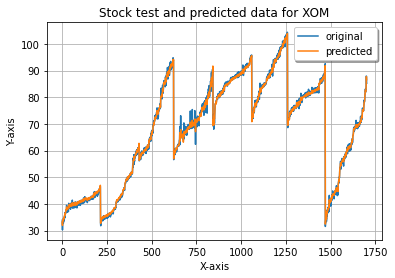

In [0]:
x_ax1 = range(0, predictions1.count())
y_pred1 = predictions1.select("prediction").collect()
y_orig1 = predictions1.select("Close").collect()

plt.plot(x_ax1, y_orig1, label="original")
plt.plot(x_ax1, y_pred1, label="predicted")
plt.title("Stock test and predicted data for XOM")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

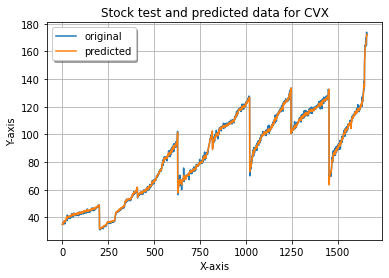

In [0]:
x_ax2 = range(0, predictions2.count())
y_pred2 = predictions2.select("prediction").collect()
y_orig2 = predictions2.select("Close").collect()

plt.plot(x_ax2, y_orig2, label="original")
plt.plot(x_ax2, y_pred2, label="predicted")
plt.title("Stock test and predicted data for CVX")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

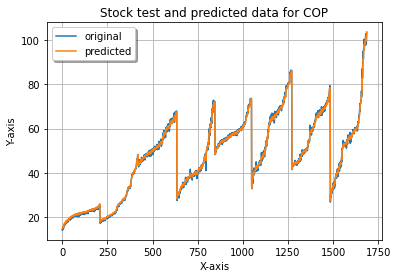

In [0]:
x_ax3 = range(0, predictions3.count())
y_pred3 = predictions3.select("prediction").collect()
y_orig3 = predictions3.select("Close").collect()

plt.plot(x_ax3, y_orig3, label="original")
plt.plot(x_ax3, y_pred3, label="predicted")
plt.title("Stock test and predicted data for COP")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

**RESULT:** The predicted prices are very close to the original Closing price of the companies.So our model has done a good job predicting the stock price.

##LSTM Model

In [0]:
trainDF_XOM = stock_price_XOM[stock_price_XOM.Year < 2017] 
testDF_XOM = stock_price_XOM[stock_price_XOM.Year > 2016]

In [0]:
trainDF_CVX = stock_price_CVX[stock_price_CVX.Year < 2017] 
testDF_CVX= stock_price_CVX[stock_price_CVX.Year > 2016]

In [0]:
trainDF_COP = stock_price_COP[stock_price_COP.Year < 2017] 
testDF_COP = stock_price_COP[stock_price_COP.Year > 2016]

In [0]:
trainArray_XOM = np.array(trainDF_XOM.select('Open', 'High', 'Low', 'Close','Volume', 'Adj Close' ).collect())
testArray_XOM = np.array(testDF_XOM.select('Open', 'High', 'Low', 'Close','Volume', 'Adj Close' ).collect())

In [0]:
trainArray_CVX = np.array(trainDF_CVX.select('Open', 'High', 'Low', 'Close','Volume', 'Adj Close' ).collect())
testArray_CVX = np.array(testDF_CVX.select('Open', 'High', 'Low', 'Close','Volume', 'Adj Close' ).collect())

In [0]:
trainArray_COP = np.array(trainDF_COP.select('Open', 'High', 'Low', 'Close','Volume', 'Adj Close' ).collect())
testArray_COP = np.array(testDF_COP.select('Open', 'High', 'Low', 'Close','Volume', 'Adj Close' ).collect())

In [0]:
print(trainArray_XOM[0])
print('-------------')
print(testArray_XOM[0])

[3.97500000e+01 4.03750000e+01 3.89375000e+01 3.91562500e+01
 1.34582000e+07 1.94720154e+01]
-------------
[9.09400024e+01 9.13399963e+01 9.01500015e+01 9.08899994e+01
 1.03606000e+07 6.85234146e+01]


In [0]:
print(trainArray_CVX[0])
print('-------------')
print(testArray_CVX[0])

[4.29375000e+01 4.29375000e+01 4.12812500e+01 4.18125000e+01
 4.38760000e+06 1.83118114e+01]
-------------
[1.18379997e+02 1.19000000e+02 1.16589996e+02 1.17849998e+02
 7.40480000e+06 9.25668259e+01]


In [0]:
print(trainArray_COP[0])
print('-------------')
print(testArray_COP[0])

[1.77238598e+01 1.77715054e+01 1.72474117e+01 1.72712345e+01
 1.86221900e+06 8.65206051e+00]
-------------
[5.08199997e+01 5.16100006e+01 4.99199982e+01 5.06100006e+01
 7.03260000e+06 4.36759949e+01]


In [0]:
from sklearn.preprocessing import MinMaxScaler
minMaxScale = MinMaxScaler()

In [0]:
minMaxScale.fit(trainArray_XOM)
minMaxScale.fit(trainArray_CVX)
minMaxScale.fit(trainArray_COP)

Out[57]: MinMaxScaler()

In [0]:
testingArray_XOM = minMaxScale.transform(testArray_XOM)
trainingArray_XOM = minMaxScale.transform(trainArray_XOM)

testingArray_CVX = minMaxScale.transform(testArray_CVX)
trainingArray_CVX = minMaxScale.transform(trainArray_CVX)

testingArray_COP = minMaxScale.transform(testArray_COP)
trainingArray_COP = minMaxScale.transform(trainArray_COP)

In [0]:
print("Test array for XOM",testingArray_XOM[0])
print("Train array for XOM",trainingArray_XOM[0])
print('...............................................')


print("Test array for CVX",testingArray_CVX[0])
print("Train array for XOM",trainingArray_CVX[0])
print('...............................................')

print("Test array for COP",testingArray_COP[0])
print("Train array for COP",trainingArray_COP[0])

Test array for XOM [1.05846591 1.05832462 1.05389977 1.0566195  0.12207235 0.99478824]
Train array for XOM [0.35591463 0.35890956 0.3479306  0.34738436 0.16033982 0.20187298]
...............................................
Test array for CVX [1.43506295 1.43791501 1.41837759 1.42622308 0.08555666 1.38344968]
Train array for XOM [0.3996611  0.39407588 0.38023942 0.38379977 0.04828244 0.1831183 ]
...............................................
Test array for COP [0.50784356 0.51309242 0.49932537 0.50440763 0.08095853 0.59313001]
Train array for COP [0.05361941 0.04871187 0.04893069 0.04735541 0.01708411 0.02696854]


In [0]:
xtrain_XOM = trainingArray_XOM[:, 0:-1]
xtest_XOM = testingArray_XOM[:, 0:-1]

ytrain_XOM = trainingArray_XOM[:, -1:]
ytest_XOM = testingArray_XOM[:, -1:]

In [0]:
xtrain_CVX = trainingArray_CVX[:, 0:-1]
xtest_CVX = testingArray_CVX[:, 0:-1]

ytrain_CVX = trainingArray_CVX[:, -1:]
ytest_CVX = testingArray_CVX[:, -1:]

In [0]:
xtrain_COP = trainingArray_COP[:, 0:-1]
xtest_COP = testingArray_COP[:, 0:-1]

ytrain_COP = trainingArray_COP[:, -1:]
ytest_COP = testingArray_COP[:, -1:]

##Plotting the Opening, High, Low and Closing prices by Day.

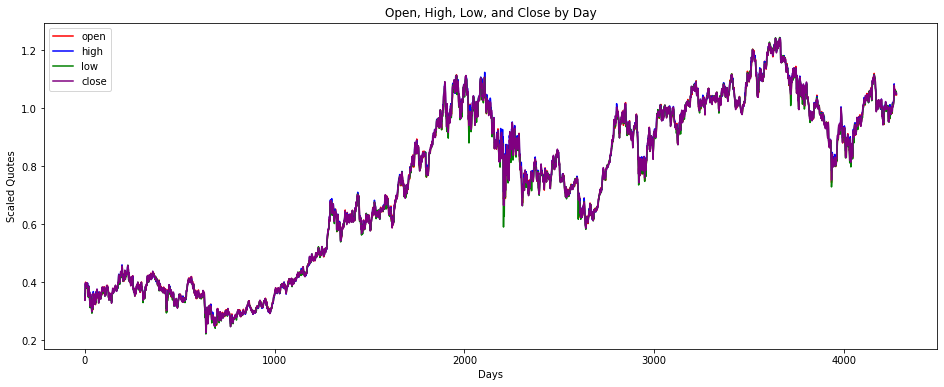

In [0]:
plt.figure(figsize=(16,6))
plt.plot(xtrain_XOM[:,0],color='red', label='open')
plt.plot(xtrain_XOM[:,1],color='blue', label='high')
plt.plot(xtrain_XOM[:,2],color='green', label='low')
plt.plot(xtrain_XOM[:,3],color='purple', label='close')
plt.legend(loc = 'upper left')
plt.title('Open, High, Low, and Close by Day')
plt.xlabel('Days')
plt.ylabel('Scaled Quotes')
plt.show()

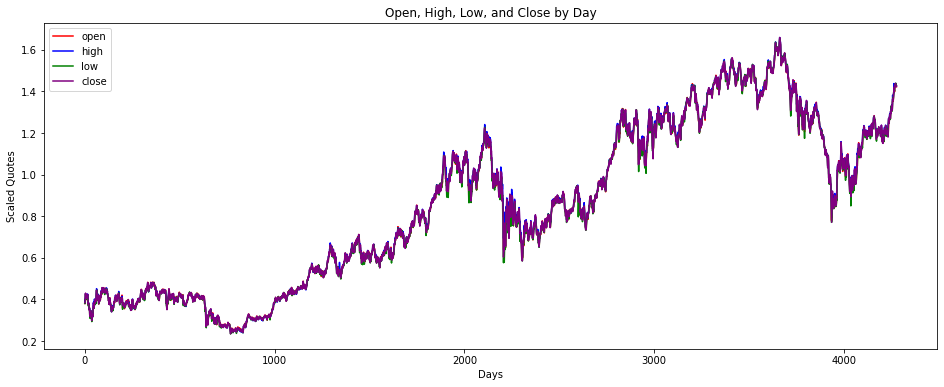

In [0]:
plt.figure(figsize=(16,6))
plt.plot(xtrain_CVX[:,0],color='red', label='open')
plt.plot(xtrain_CVX[:,1],color='blue', label='high')
plt.plot(xtrain_CVX[:,2],color='green', label='low')
plt.plot(xtrain_CVX[:,3],color='purple', label='close')
plt.legend(loc = 'upper left')
plt.title('Open, High, Low, and Close by Day')
plt.xlabel('Days')
plt.ylabel('Scaled Quotes')
plt.show()

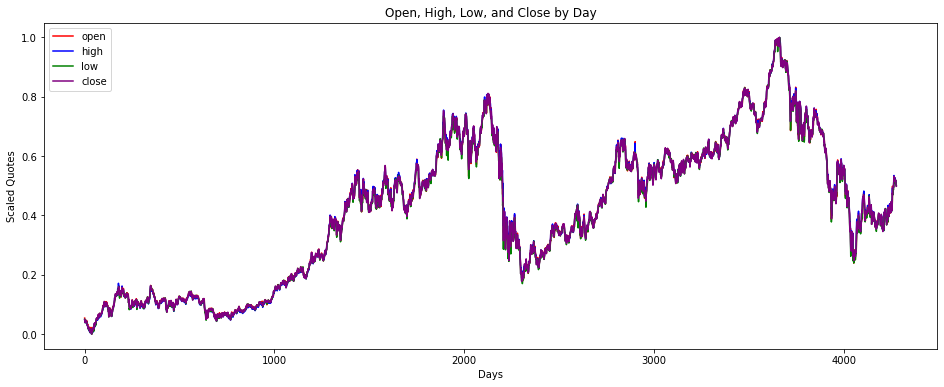

In [0]:
plt.figure(figsize=(16,6))
plt.plot(xtrain_COP[:,0],color='red', label='open')
plt.plot(xtrain_COP[:,1],color='blue', label='high')
plt.plot(xtrain_COP[:,2],color='green', label='low')
plt.plot(xtrain_COP[:,3],color='purple', label='close')
plt.legend(loc = 'upper left')
plt.title('Open, High, Low, and Close by Day')
plt.xlabel('Days')
plt.ylabel('Scaled Quotes')
plt.show()

Building the Model

In [0]:
from keras import models, layers
model = models.Sequential()
model.add(layers.LSTM(1, input_shape=(1,5)))
model.add(layers.Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [0]:
xtrain_XOM = xtrain_XOM.reshape((xtrain_XOM.shape[0], 1, xtrain_XOM.shape[1]))
xtest_XOM = xtest_XOM.reshape((xtest_XOM.shape[0], 1, xtest_XOM.shape[1]))

In [0]:
xtrain_CVX = xtrain_CVX.reshape((xtrain_CVX.shape[0], 1, xtrain_CVX.shape[1]))
xtest_CVX = xtest_CVX.reshape((xtest_CVX.shape[0], 1, xtest_CVX.shape[1]))

In [0]:
xtrain_COP = xtrain_COP.reshape((xtrain_COP.shape[0], 1, xtrain_COP.shape[1]))
xtest_COP = xtest_COP.reshape((xtest_COP.shape[0], 1, xtest_COP.shape[1]))

In [0]:
loss_XOM = model.fit(xtrain_XOM, ytrain_XOM, batch_size=10, epochs=100)


Epoch 1/100
428/428 [==============================] - 3s 3ms/step - loss: 0.2134
Epoch 2/100
428/428 [==============================] - 1s 2ms/step - loss: 0.0350
Epoch 3/100
428/428 [==============================] - 1s 2ms/step - loss: 0.0237
Epoch 4/100
428/428 [==============================] - 1s 3ms/step - loss: 0.0131
Epoch 5/100
428/428 [==============================] - 1s 2ms/step - loss: 0.0059
Epoch 6/100
428/428 [==============================] - 1s 3ms/step - loss: 0.0033
Epoch 7/100
428/428 [==============================] - 1s 2ms/step - loss: 0.0027
Epoch 8/100
428/428 [==============================] - 1s 2ms/step - loss: 0.0026
Epoch 9/100
320/428 [=====================>........] - ETA: 0s - loss: 0.0025

*** WARNING: max output size exceeded, skipping output. ***

428/428 [==============================] - 1s 2ms/step - loss: 0.0017
Epoch 93/100
428/428 [==============================] - 1s 2ms/step - loss: 0.0018
Epoch 94/100
428/428 [===========================

Plotting the loss error of our model for each company.

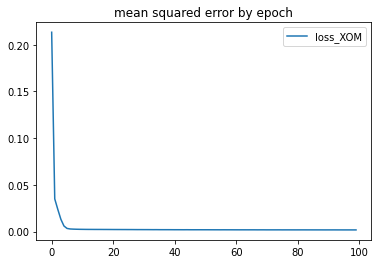

In [0]:
plt.plot(loss_XOM.history['loss'], label = 'loss_XOM')
plt.title('mean squared error by epoch')
plt.legend()
plt.show()

In [0]:
loss_CVX = model.fit(xtrain_CVX, ytrain_CVX, batch_size=10, epochs=100)


Epoch 1/100
428/428 [==============================] - 1s 2ms/step - loss: 0.0043
Epoch 2/100
428/428 [==============================] - 1s 2ms/step - loss: 0.0042
Epoch 3/100
428/428 [==============================] - 1s 3ms/step - loss: 0.0041
Epoch 4/100
428/428 [==============================] - 1s 2ms/step - loss: 0.0041
Epoch 5/100
428/428 [==============================] - 1s 2ms/step - loss: 0.0041
Epoch 6/100
428/428 [==============================] - 1s 2ms/step - loss: 0.0041
Epoch 7/100
428/428 [==============================] - 1s 2ms/step - loss: 0.0041
Epoch 8/100
428/428 [==============================] - 1s 2ms/step - loss: 0.0040
Epoch 9/100
426/428 [============================>.] - ETA: 0s - loss: 0.0040

*** WARNING: max output size exceeded, skipping output. ***

428/428 [==============================] - 1s 3ms/step - loss: 0.0040
Epoch 93/100
428/428 [==============================] - 1s 2ms/step - loss: 0.0040
Epoch 94/100
428/428 [======

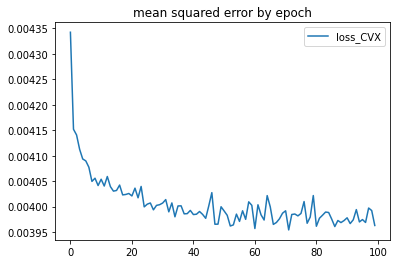

In [0]:
plt.plot(loss_CVX.history['loss'], label = 'loss_CVX')
plt.title('mean squared error by epoch')
plt.legend()
plt.show()

In [0]:
loss_COP = model.fit(xtrain_COP, ytrain_COP, batch_size=10, epochs=100)

Epoch 1/100
428/428 [==============================] - 1s 3ms/step - loss: 0.0046
Epoch 2/100
428/428 [==============================] - 1s 2ms/step - loss: 0.0034
Epoch 3/100
428/428 [==============================] - 1s 3ms/step - loss: 0.0031
Epoch 4/100
428/428 [==============================] - 1s 2ms/step - loss: 0.0030
Epoch 5/100
428/428 [==============================] - 1s 2ms/step - loss: 0.0029
Epoch 6/100
428/428 [==============================] - 1s 2ms/step - loss: 0.0029
Epoch 7/100
428/428 [==============================] - 1s 2ms/step - loss: 0.0028
Epoch 8/100
428/428 [==============================] - 1s 2ms/step - loss: 0.0028
Epoch 9/100
306/428 [====================>.........] - ETA: 0s - loss: 0.0029

*** WARNING: max output size exceeded, skipping output. ***

428/428 [==============================] - 1s 3ms/step - loss: 0.0027
Epoch 93/100
428/428 [==============================] - 1s 2ms/step - loss: 0.0027
Epoch 94/100
428/428 [==================

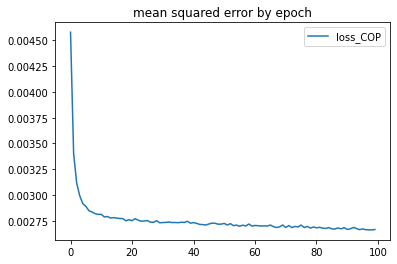

In [0]:
plt.plot(loss_COP.history['loss'], label = 'loss_COP')
plt.title('mean squared error by epoch')
plt.legend()
plt.show()

In [0]:
predicted_XOM = model.predict(xtest_XOM)

42/42 [==============================] - 1s 2ms/step


In [0]:
predicted_CVX = model.predict(xtest_CVX)

42/42 [==============================] - 0s 2ms/step


In [0]:
predicted_COP = model.predict(xtest_COP)

42/42 [==============================] - 0s 2ms/step


In [0]:
combined_array_XOM = np.concatenate((ytest_XOM, predicted_XOM), axis = 1)

In [0]:
combined_array_CVX = np.concatenate((ytest_CVX, predicted_CVX), axis = 1)

In [0]:
combined_array_COP = np.concatenate((ytest_COP, predicted_COP), axis = 1)

##Plotting the Actual and Predicted prices using the LSTM model

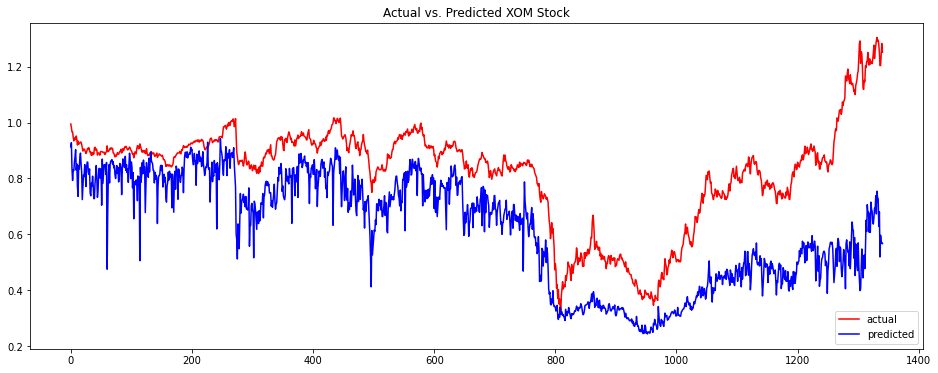

In [0]:
plt.figure(figsize=(16,6))
plt.plot(combined_array_XOM[:,0],color='red', label='actual')
plt.plot(combined_array_XOM[:,1],color='blue', label='predicted')
# plt.set_index('year', inplace=True)
plt.legend(loc = 'lower right')
plt.title('Actual vs. Predicted XOM Stock')

plt.show()

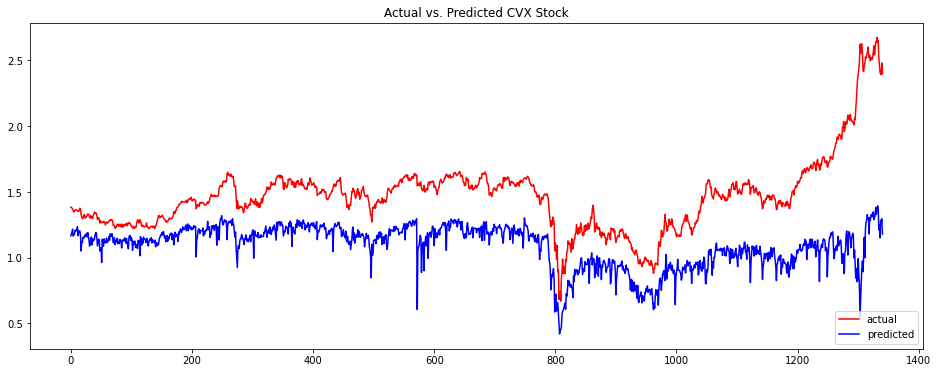

In [0]:
plt.figure(figsize=(16,6))
plt.plot(combined_array_CVX[:,0],color='red', label='actual')
plt.plot(combined_array_CVX[:,1],color='blue', label='predicted')
plt.legend(loc = 'lower right')
plt.title('Actual vs. Predicted CVX Stock')

plt.show()

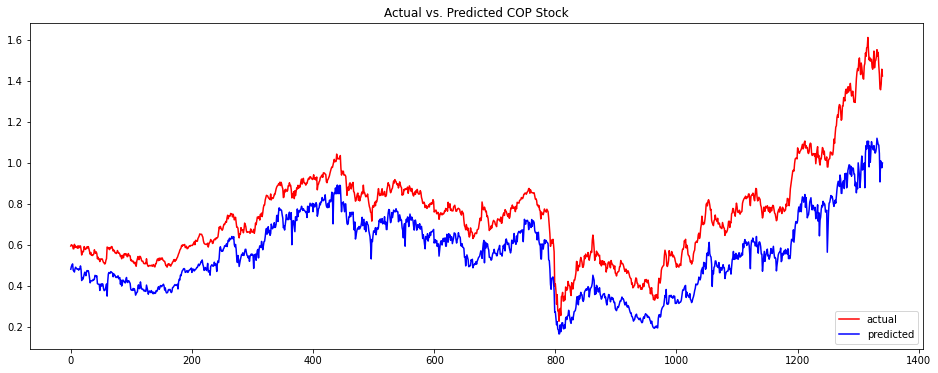

In [0]:
plt.figure(figsize=(16,6))
plt.plot(combined_array_COP[:,0],color='red', label='actual')
plt.plot(combined_array_COP[:,1],color='blue', label='predicted')
plt.legend(loc = 'lower right')
plt.title('Actual vs. Predicted COP Stock')

plt.show()


In [0]:
import sklearn.metrics as metrics
np.sqrt(metrics.mean_squared_error(ytest_XOM,predicted_XOM))

Out[90]: 0.24460760740973542

In [0]:
np.sqrt(metrics.mean_squared_error(ytest_CVX,predicted_CVX))

Out[91]: 0.44736138458113883

In [0]:
np.sqrt(metrics.mean_squared_error(ytest_COP,predicted_COP))

Out[92]: 0.19694735981792247

**RESULT:** the LSTM model can predict the trend of the actual stock prices very closely.  Though the model predicted little lower value as compared to actual stock value. The accuracy of the model can be enhanced by training with more data and increasing the LSTM layers.

**Project Interpretation:** The linear regression model was pretty good to predict the stock price. The prediction is only short-term. One challenge is since the stock market can be volatile, We cannot recommend our clients to invest in the stock market based on this result for medium to long term forecast periods,
the LSTM model can predict the trend of the actual stock prices very closely.  Though the model predicted a little lower value as compared to the actual stock value. The accuracy of the model can be enhanced by training with more data and increasing the LSTM layers.